In [11]:
!pip install numpy
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install r2_score
!pip install scikit-learn
!pip install matplotlib
!pip install openpyxl


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement r2_score (from versions: none)
ERROR: No matching distribution found for r2_score
You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\haydencordeiro\Desktop\ADT project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [15]:
df = pd.read_excel("./data/output_data_filtered.xlsx")


In [16]:
df.head()

,Countries,Year,Value
0,Algeria,1960,11394307
1,Angola,1960,5357195
2,Benin,1960,2512284
3,Botswana,1960,512865
4,Burkina Faso,1960,4783259


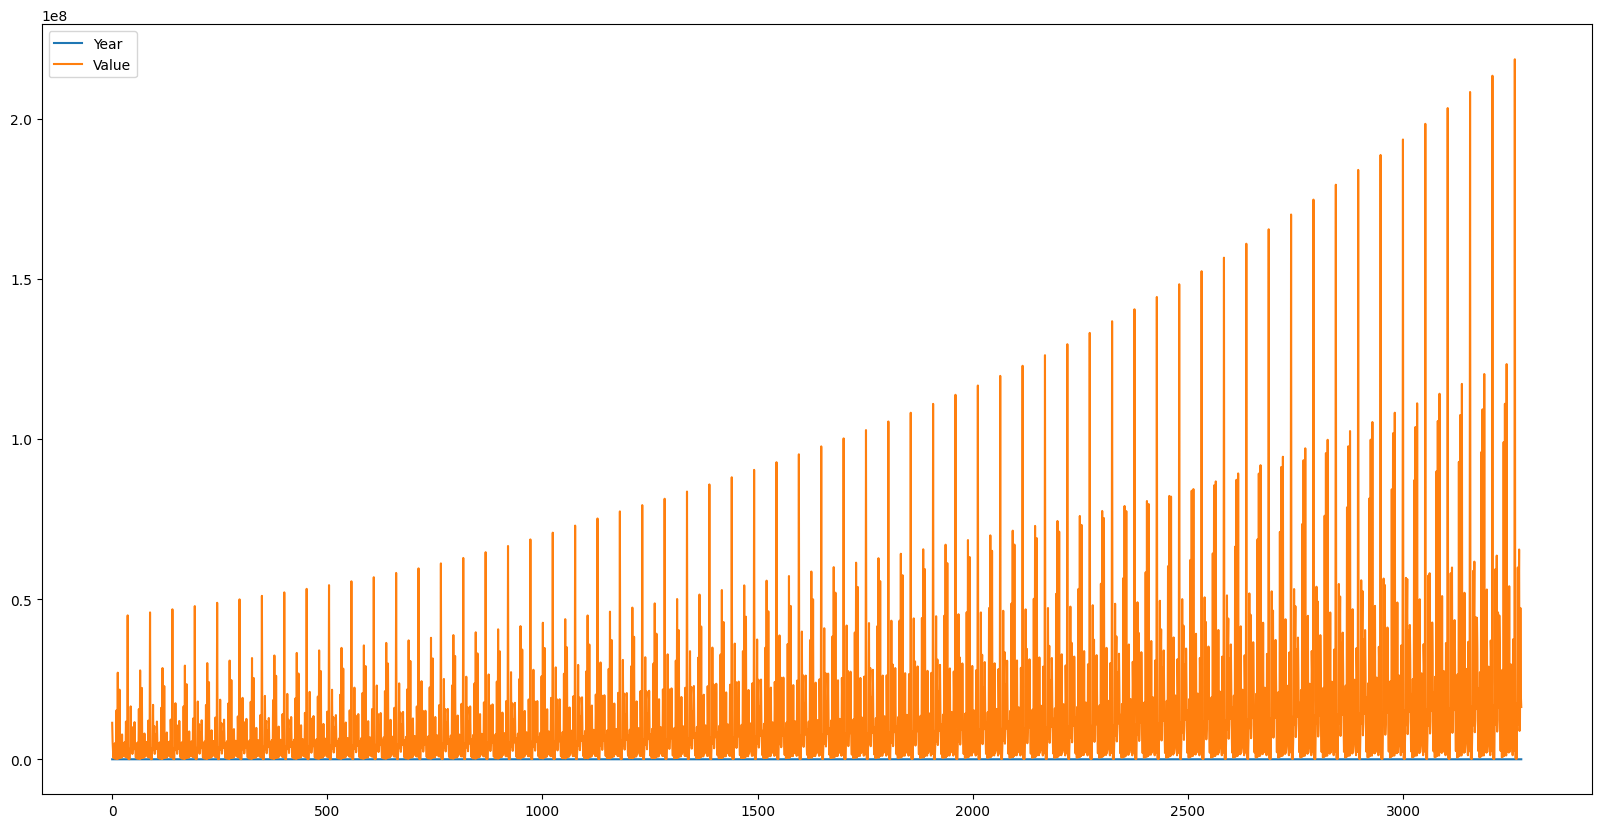

In [17]:
df.plot(figsize = (20,10))
plt.show()

In [41]:
columns_to_include = [col for col in df.columns if col != 'Countries']

adfuller_result = adfuller(df['Year'])
pvalue = adfuller_result[1]
print(adfuller_result)
if pvalue < 0.05:
    print("stationary")
else:
    print("non-stationary")

ValueError: x is required to have ndim 1 but has ndim 2

,Year,Value
0,1960,11394307
1,1960,5357195
2,1960,2512284
3,1960,512865
4,1960,4783259
...,...,...
3271,2022,8848699
3272,2022,12356117
3273,2022,47249585
3274,2022,20017675


In [39]:
adfuller_result = adfuller(df.dropna().diff().dropna())
pvalue = adfuller_result[1]
print(adfuller_result)
if pvalue < 0.05:
    print("stationary")
else:
    print("non-stationary")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [24]:
train, test = train_test_split(df, test_size = 0.2,random_state = 13, shuffle = False)


In [25]:
train

,Countries,Year,Value
0,Algeria,1960,11394307
1,Angola,1960,5357195
2,Benin,1960,2512284
3,Botswana,1960,512865
4,Burkina Faso,1960,4783259
...,...,...,...
2615,Eritrea,2010,3147727
2616,Eswatini,2010,1099920
2617,Ethiopia,2010,89237791
2618,Gabon,2010,1711105


In [26]:
test

,Countries,Year,Value
2620,Ghana,2010,25574719
2621,Guinea,2010,10270728
2622,Guinea-Bissau,2010,1567220
2623,Kenya,2010,41517895
2624,Lesotho,2010,2022747
...,...,...,...
3271,Togo,2022,8848699
3272,Tunisia,2022,12356117
3273,Uganda,2022,47249585
3274,Zambia,2022,20017675


In [27]:
p, d, q = 1,1,1
fcst = []
for step in range(test.shape[0]):
    try:
        arima = ARIMA(train, order = (p,d,q))
        arima_final = arima.fit()
        prediction = arima_final.forecast(steps = 1)
        fcst.append(prediction[0])
        train = train.append(pd.Series(test.iloc[step]))
    except:
        error = -99999
        print("error")
        fcst.append(error)
        tmp = test.iloc[step]
        tmp[0] = error
        train = train.append(pd.Series(tmp))

error


AttributeError: 'DataFrame' object has no attribute 'append'